In [3]:
# Load Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
### Load the Dataset
df = pd.read_csv('boston_house_prices.csv')
df.rename(columns={"MEDV": "PRICE"}, inplace=True)
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
### Get description on the data using summary stats
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
### Get information on the data
df.info() #No missing values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


<Axes: >

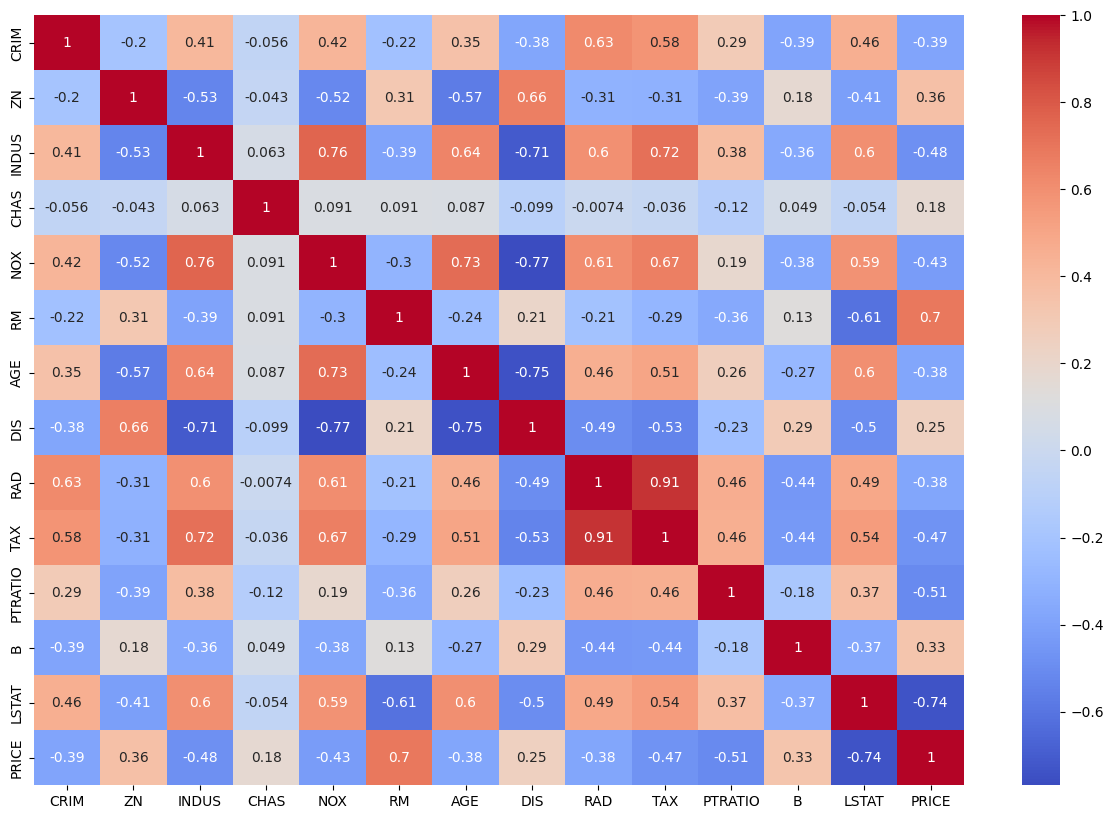

In [7]:
### Exploratory Data Analysis
# Correlation 
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap= 'coolwarm')

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

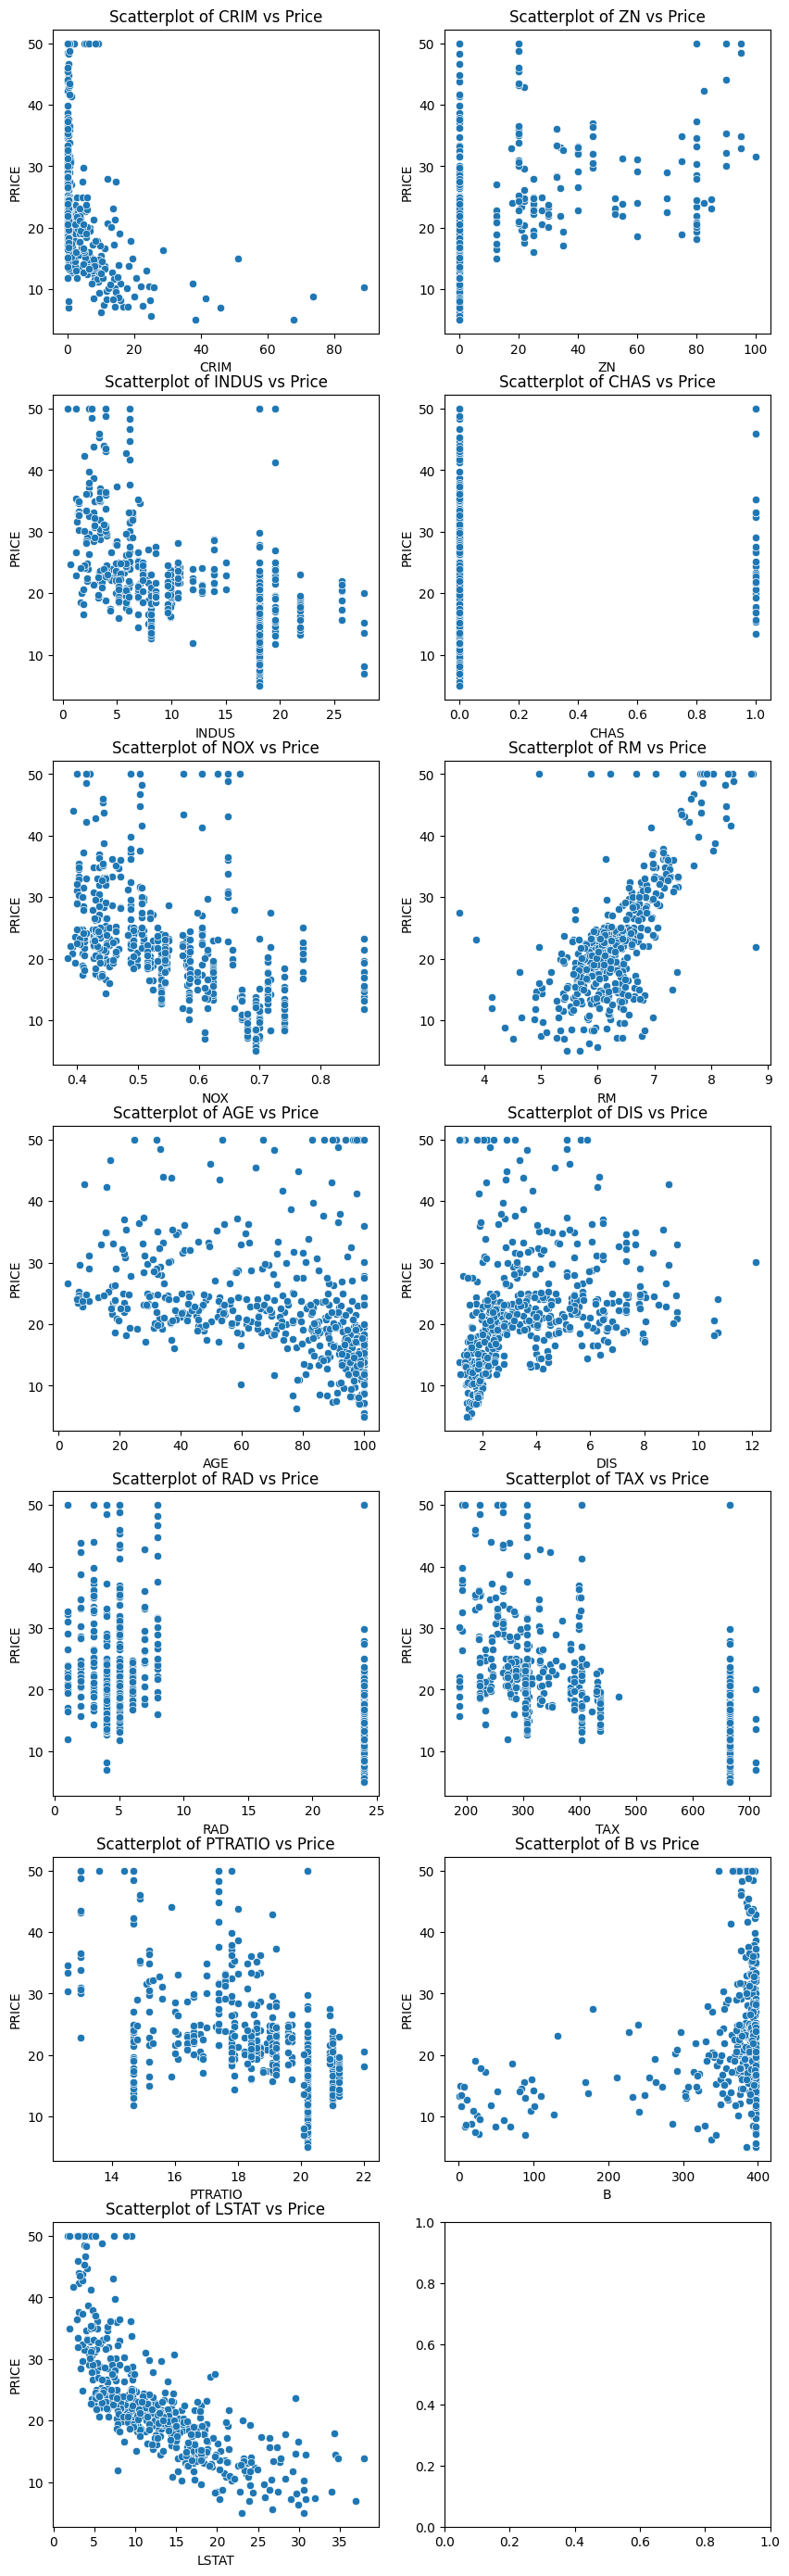

In [8]:
df_columns = [col for col in df.columns if col != "PRICE"]

num_col = 2
num_rows = -(-len(df_columns) // num_col)

fig, axs = plt.subplots(num_rows, num_col, figsize=(10, 5*num_rows))
axs = axs.flatten()  # Flatten the array of axes for easy iteration

for idx, col in enumerate(df_columns):
    sns.scatterplot(data=df, x=col, y='PRICE', ax=axs[idx])
    axs[idx].set_title(f"Scatterplot of {col} vs Price")

plt.tight_layout

In [9]:
X = df.drop(columns=['PRICE'], axis=1)
y = df['PRICE']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print(f'Coefficients values: {lin_reg.coef_}')
print(lin_reg.intercept_)
print(lin_reg.get_params())

y_pred = lin_reg.predict(X_test)

Coefficients values: [-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]
23.01581920903955
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


<Axes: xlabel='PRICE'>

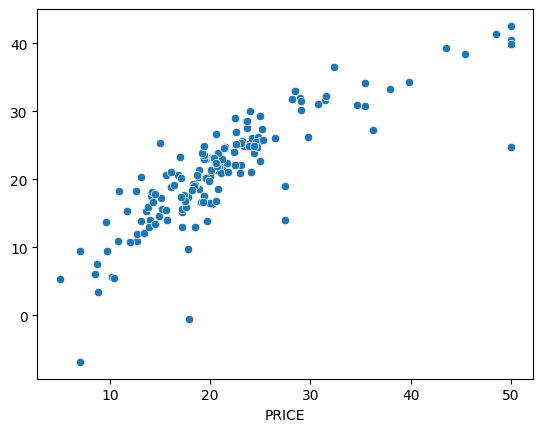

In [12]:
sns.scatterplot(x=y_test, y=y_pred,)

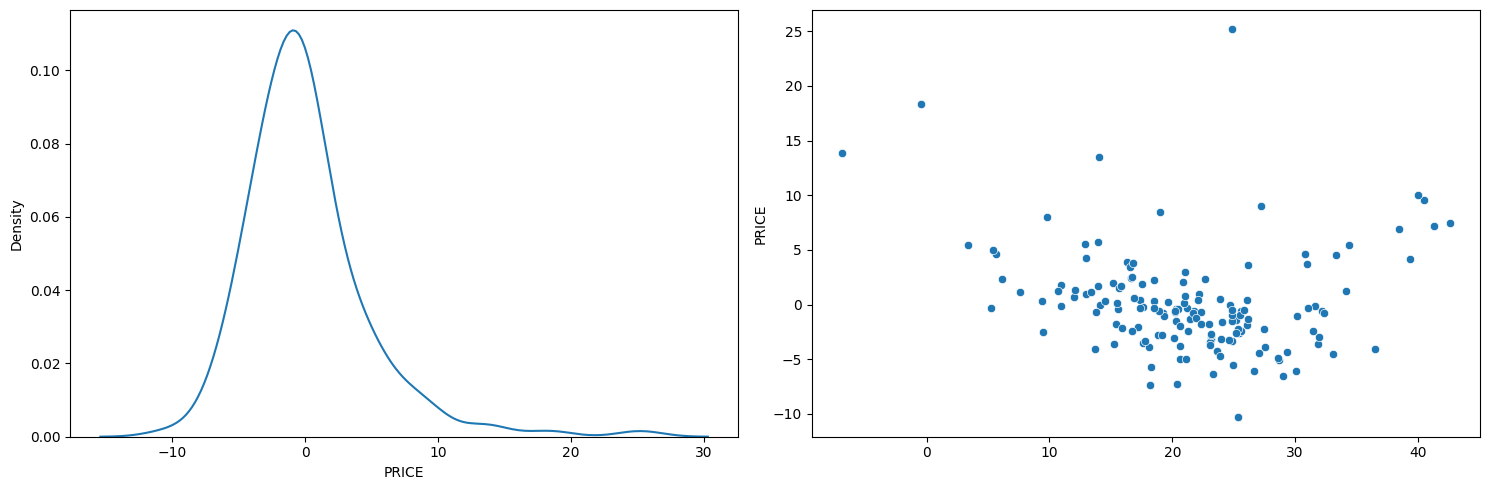

In [13]:
### Residuals
residuals = y_test - y_pred
num_rows = 1
num_col = 2

fig, axs = plt.subplots(nrows=num_rows, ncols=num_col, figsize=(15, 5*num_rows))

sns.kdeplot(residuals, ax=axs[0])  # Use kdeplot instead of displot

sns.scatterplot(x=y_pred, y=residuals, ax=axs[1])

plt.tight_layout()
plt.show()

In [14]:
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mse, r2, adj_r2

(21.51744423117721, 0.7112260057484932, 0.6840226584639308)

In [17]:
# Export Model and Scaler as a pickle file
import pickle 
pickle.dump(lin_reg, open('regmodel.pkl', 'wb'), protocol=4)
pickle.dump(scaler, open('scaler.pkl', 'wb'), protocol=4)

In [18]:
df.iloc[0]

CRIM         0.00632
ZN          18.00000
INDUS        2.31000
CHAS         0.00000
NOX          0.53800
RM           6.57500
AGE         65.20000
DIS          4.09000
RAD          1.00000
TAX        296.00000
PTRATIO     15.30000
B          396.90000
LSTAT        4.98000
PRICE       24.00000
Name: 0, dtype: float64